# Global Sales Data Analytics

<h4> IMPORTING REQUIRED LIBRARIES
  

In [2]:
#Data Manipulation
import pandas as pd
#Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#### IMPORTING THE DATASET

In [3]:
df = pd.read_excel('Global_Superstore.xlsx')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


#### CUSTOMER ANALYSIS

Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer and plot a histogram to get the threshold for Low/Mid/High frequency customers

Does the high frequent customers are contributing more revenue

Are they also profitable - what is the profit margin across the buckets

Which customer segment is most profitable in each year ( there is a column called customer segment)

How the customers are distributed across the countries - pie chart

Write a function to split the global store data into different unique data frames based on the unique values in country column (Means, we should have one data frame for one country as function output )

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

In [6]:
df.shape

(51290, 23)

In [7]:
df.describe()
# checks the negative trend in profit and the decrease in discount of range

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [8]:
df.isnull().sum()
# checks if there are null entries

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

Checking how many of them are categorical and how many unique values each categorical columns have,

In [9]:
cat_cols = df.select_dtypes(exclude= ['int64', 'float64']).columns
cat_cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')

In [10]:
num_colms = df._get_numeric_data()
num_colms.head()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,2309.650,7,0.0,762.1845,933.57
1,26341,3709.395,9,0.1,-288.7650,923.63
2,25330,5175.171,9,0.1,919.9710,915.49
3,13524,2892.510,5,0.1,-96.5400,910.16
4,47221,2832.960,8,0.0,311.5200,903.04


###### 1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer and plot a histogram to get the threshold for Low/Mid/High frequency customers

In [11]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [12]:
df_customer = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']]
df_customer.count()

Customer ID    51290
Order ID       51290
Order Date     51290
Ship Date      51290
Ship Mode      51290
Country        51290
dtype: int64

In [13]:
df_customer1 = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']].drop_duplicates()
df_customer1.count()

Customer ID    25754
Order ID       25754
Order Date     25754
Ship Date      25754
Ship Mode      25754
Country        25754
dtype: int64

In [14]:
df_customer1.head()

,Customer ID,Order ID,Order Date,Ship Date,Ship Mode,Country
0,RH-19495,CA-2012-124891,31-07-2012,31-07-2012,Same Day,United States
1,JR-16210,IN-2013-77878,05-02-2013,07-02-2013,Second Class,Australia
2,CR-12730,IN-2013-71249,17-10-2013,18-10-2013,First Class,Australia
3,KM-16375,ES-2013-1579342,28-01-2013,30-01-2013,First Class,Germany
4,RH-9495,SG-2013-4320,05-11-2013,06-11-2013,Same Day,Senegal


In [15]:
df_customer1['Customer ID'].nunique()

1590

there are only 1590 unique customer ids out of 25754 rows in the customer data

In [39]:
#def new_features(x):
 #   d = []
  # d.append(x['Sales'].sum()) 
   # d.append(x['Shipping Cost'].sum())
    #d.append(pd.to_datetime(x['Order Date']).min())
   ##d.append(x['City'].nunique())
    #return pd.Series(d, index=['Purchases','Total_Sales','Total_Cost','First_Purchase_Date','Latest_Purchase_Date','Location_Count'])

#df_customer_new = df.groupby('Customer ID').apply(new_features)

In [21]:
df_customer_new.columns

Index(['Purchases', 'Total_Sales', 'Total_Cost', 'First_Purchase_Date',
       'Latest_Purchase_Date', 'Location_Count'],
      dtype='object')

In [22]:
from datetime import datetime
df_customer_new['Duration'] = (df_customer_new['Latest_Purchase_Date'] - df_customer_new['First_Purchase_Date']).dt.days

In [23]:
df_customer_new['Frequency'] = df_customer_new['Duration']/df_customer_new['Purchases']
df_customer_new['Frequency'].head()

Customer ID
AA-10315     71.736842
AA-10375     58.434783
AA-10480     66.650000
AA-10645     39.527778
AA-315      177.285714
Name: Frequency, dtype: float64

In [24]:
df_customer_new.head()

,Purchases,Total_Sales,Total_Cost,First_Purchase_Date,Latest_Purchase_Date,Location_Count,Duration,Frequency
Customer ID,,,,,,,,
AA-10315,19,13747.41300,1236.15,2011-03-31,2014-12-23,18,1363,71.736842
AA-10375,23,5884.19500,903.92,2011-04-21,2014-12-25,23,1344,58.434783
AA-10480,20,17695.58978,1633.67,2011-01-11,2014-09-05,20,1333,66.650000
AA-10645,36,15343.89070,1752.27,2011-01-12,2014-12-05,35,1423,39.527778
AA-315,7,2243.25600,215.80,2011-08-06,2014-12-29,7,1241,177.285714


In [26]:
df_customer_new['Frequency'].describe()

count    1590.000000
mean      111.303339
std        80.489358
min         0.000000
25%        50.669643
50%        73.055728
75%       155.083333
max       655.500000
Name: Frequency, dtype: float64

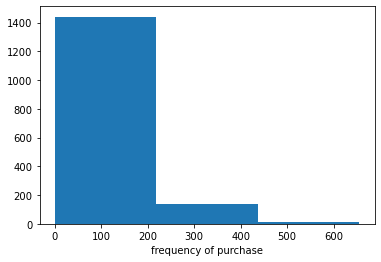

In [27]:
# 1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for
# each customer and plot a histogram to get the threshold for Low/Mid/High frequency customers

plt.hist(df_customer_new['Frequency'], bins=3)
plt.xlabel('frequency of purchase')
plt.show()

In [28]:
# bucketing continuous data
def freq(x):
    if x < 219:
        return 'Low' 
    elif x < 436:
        return 'Mid' 
    else:
        return 'High'

df_customer_new['freq_range'] = df_customer_new.Frequency.apply(freq)

df_customer_new['freq_range'].value_counts()

Low     1442
Mid      138
High      10
Name: freq_range, dtype: int64

In [29]:
# profiling based on purchase frequency
df_customer_new.head()

,Purchases,Total_Sales,Total_Cost,First_Purchase_Date,Latest_Purchase_Date,Location_Count,Duration,Frequency,freq_range
Customer ID,,,,,,,,,
AA-10315,19,13747.41300,1236.15,2011-03-31,2014-12-23,18,1363,71.736842,Low
AA-10375,23,5884.19500,903.92,2011-04-21,2014-12-25,23,1344,58.434783,Low
AA-10480,20,17695.58978,1633.67,2011-01-11,2014-09-05,20,1333,66.650000,Low
AA-10645,36,15343.89070,1752.27,2011-01-12,2014-12-05,35,1423,39.527778,Low
AA-315,7,2243.25600,215.80,2011-08-06,2014-12-29,7,1241,177.285714,Low


2.Are the high frequent customers contributing more revenue

In [32]:
import numpy as np
result = df.groupby(["Customer Name"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False).head(20)

In [33]:
df_customer_new['Revenue'] = df_customer_new['Purchases'] *  df_customer_new['Total_Sales']

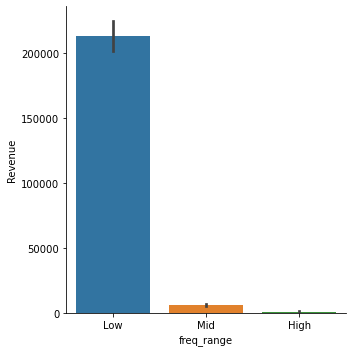

In [34]:
sns.catplot(x="freq_range", y="Revenue", kind="bar", data=df_customer_new);

From the graph we can see that the high frequent customers are contrinuting less

1.Are they also profitable - what is the profit margin across the buckets

In [35]:
profit_margin = df_customer_new.groupby('freq_range')

In [36]:
profit_margin

4. Which customer segment is most profitable in each year ( there is a column called customer segment)

In [37]:
df.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

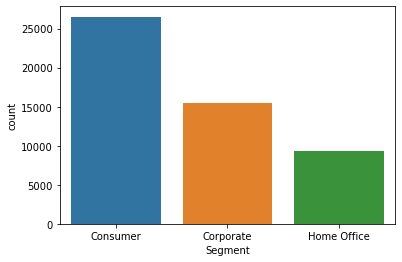

In [38]:
sns.countplot(x="Segment",data = df)